<a href="https://colab.research.google.com/github/jaeohshin/ML_with_Pytorch_Sklearn_rasbt/blob/main/pytorch_blitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch-bliz 60 min.

https://pytorch.org/tutorials/beginner/blitz/




In [1]:
import torch
import numpy as np

## Basics of Tensor

In [2]:
data = [[1, 2], [3,4]]
x_data = torch.tensor(data)

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
print(np_array)

[[1 2]
 [3 4]]


In [5]:
print(x_np)

tensor([[1, 2],
        [3, 4]])


In [6]:
x_ones = torch.ones_like(x_data)

In [7]:
print(x_ones)

tensor([[1, 1],
        [1, 1]])


In [8]:
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[0.8359, 0.5763],
        [0.9678, 0.5279]]) 



In [9]:
shape = (2, 3, )
rand_tensor = torch.rand(shape)
print(f'rand_tensor: \n {rand_tensor}\n')

rand_tensor: 
 tensor([[0.2375, 0.4965, 0.5551],
        [0.7973, 0.4030, 0.0877]])



In [10]:
shape = (2, 3)
rand_tensor = torch.rand(shape)
print(f'rand_tensor: \n {rand_tensor}\n')

rand_tensor: 
 tensor([[0.0597, 0.9668, 0.5168],
        [0.1105, 0.7926, 0.6340]])



In [11]:
tensor = torch.rand(3, 4)

In [12]:
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [13]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Device tensor is stored on: {tensor.device}")

In [14]:
tensor = torch.ones(4, 4, )
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [15]:
tensor[:, 1]=0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [16]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [17]:
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 



In [18]:
print(tensor*tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [19]:
print(tensor@tensor.T)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [20]:
print(tensor.matmul(tensor.T))

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [21]:
print(tensor, "\n")

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 



In [22]:
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [23]:
print(tensor.add_(5))

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [24]:
print(tensor)

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [25]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [26]:
t.add_(1)
print(t)
print(n)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [27]:
n = np.ones(5)
t = torch.from_numpy(n)

In [28]:
np.add(n, 1, out=n)
print(t)
print(n)

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[2. 2. 2. 2. 2.]


## Autograd

In [29]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 48.1MB/s]


In [30]:
prediction = model(data)

In [31]:
loss = (prediction - labels).sum()

In [32]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [33]:
for param in model.parameters():
    print(param.grad)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


## Neural Network

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [45]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        c1 = F.relu(self.conv1(input))

        s2 = F.max_pool2d(c1, (2, 2))

        c3 = F.relu(self.conv2(s2))

        s4 = F.max_pool2d(c3, 2)

        s4 = torch.flatten(s4, 1)

        f5 = F.relu(self.fc1(s4))

        f6 = F.relu(self.fc2(f5))

        output = self.fc3(f6)
        return output

net = Net()
print(net)



Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [46]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [47]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0119, -0.0464, -0.0650, -0.0566,  0.1295,  0.0012, -0.1371, -0.1940,
          0.0479,  0.0244]], grad_fn=<AddmmBackward0>)


In [48]:
net.zero_grad()
out.backward(torch.randn(1, 10))

### Loss Function

In [49]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.1730, grad_fn=<MseLossBackward0>)


In [52]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [53]:
net.zero_grad()
print('conv1.bias.grad befor backward')
print(net.conv1.bias.grad)

conv1.bias.grad befor backward
None


In [54]:
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad after backward
tensor([ 0.0134, -0.0059, -0.0103, -0.0086,  0.0155,  0.0036])


In [55]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [57]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

## Training a Classifier

In [59]:
import torch
import torchvision
import torchvision.transforms as transforms

In [62]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


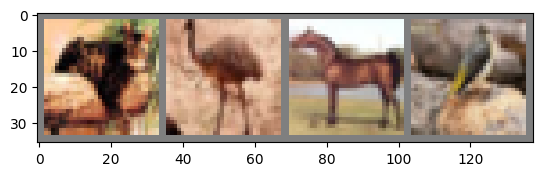

cat   bird  horse bird 


In [65]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    nping = img.numpy()
    plt.imshow(np.transpose(nping, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
imges, labels = next(dataiter)

imshow(torchvision.utils.make_grid(imges))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [66]:
import torch.nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [67]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr= 0.001, momentum=0.9)

In [68]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.200
[1,  4000] loss: 1.852
[1,  6000] loss: 1.701
[1,  8000] loss: 1.588
[1, 10000] loss: 1.524
[1, 12000] loss: 1.472
[2,  2000] loss: 1.418
[2,  4000] loss: 1.382
[2,  6000] loss: 1.370
[2,  8000] loss: 1.329
[2, 10000] loss: 1.318
[2, 12000] loss: 1.295
[3,  2000] loss: 1.232
[3,  4000] loss: 1.224
[3,  6000] loss: 1.217
[3,  8000] loss: 1.195
[3, 10000] loss: 1.197
[3, 12000] loss: 1.197
[4,  2000] loss: 1.088
[4,  4000] loss: 1.111
[4,  6000] loss: 1.166
[4,  8000] loss: 1.117
[4, 10000] loss: 1.118
[4, 12000] loss: 1.120
[5,  2000] loss: 1.043
[5,  4000] loss: 1.046
[5,  6000] loss: 1.060
[5,  8000] loss: 1.044
[5, 10000] loss: 1.047
[5, 12000] loss: 1.066
[6,  2000] loss: 0.980
[6,  4000] loss: 0.987
[6,  6000] loss: 0.989
[6,  8000] loss: 0.996
[6, 10000] loss: 1.010
[6, 12000] loss: 0.995
[7,  2000] loss: 0.909
[7,  4000] loss: 0.931
[7,  6000] loss: 0.959
[7,  8000] loss: 0.953
[7, 10000] loss: 0.957
[7, 12000] loss: 0.983
[8,  2000] loss: 0.877
[8,  4000] 

In [69]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

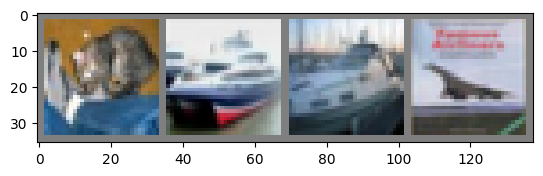

GroundTruth:  cat   ship  ship  plane


In [70]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [71]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [72]:
outputs = net(images)

In [73]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  truck ship  truck ship 


In [74]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [75]:
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %


In [76]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 61.2 %
Accuracy for class: car   is 66.0 %
Accuracy for class: bird  is 52.0 %
Accuracy for class: cat   is 36.7 %
Accuracy for class: deer  is 51.3 %
Accuracy for class: dog   is 61.2 %
Accuracy for class: frog  is 70.4 %
Accuracy for class: horse is 55.9 %
Accuracy for class: ship  is 71.5 %
Accuracy for class: truck is 84.8 %


In [77]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
